<a href="https://colab.research.google.com/github/hslee1539/rc-ai/blob/master/rc_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# rc ai



In [1]:
# 데이터 및 로딩
!git clone https://github.com/hslee1539/rc-ai

Cloning into 'rc-ai'...
remote: Enumerating objects: 120, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 218 (delta 27), reused 97 (delta 14), pack-reused 98
Receiving objects: 100% (218/218), 345.18 MiB | 48.21 MiB/s, done.
Resolving deltas: 100% (28/28), done.
Checking out files: 100% (114/114), done.


레파지토리 패스 추가

In [2]:
import sys

sys.path.append("./rc-ai/src")

데이터 로딩 및 전처리

In [3]:
import data
import numpy as np

data_model = data.DataModel("./rc-ai/data/x", "./rc-ai/data/y", (100, 100, 3), (100, 100, 3), (25, 25, 2))
result = data.load(data_model)

x_train = np.array(result[0], dtype=data_model.dtype) / 255
y_train = (np.array(result[1], dtype=data_model.dtype) / 255)
x_eval = np.array(result[2], dtype=data_model.dtype) / 255
y_eval = (np.array(result[3], dtype=data_model.dtype) / 255)
x_test = np.array(result[4], dtype=data_model.dtype) / 255
y_test = (np.array(result[5], dtype=data_model.dtype) / 255)

find data x:20210321_230444.jpg, y:20210321_230444.txt
find data x:20210227_134401.jpg, y:20210227_134401.txt
find data x:20210227_134123.jpg, y:20210227_134123.txt
find data x:20210227_134332.jpg, y:20210227_134332.txt
find data x:20210227_135051.jpg, y:20210227_135051.txt
find data x:20210227_135043.jpg, y:20210227_135043.txt
find data x:20210321_230414.jpg, y:20210321_230414.txt
find data x:20210321_230620.jpg, y:20210321_230620.txt
find data x:20210227_134241.jpg, y:20210227_134241.txt
find data x:20210227_134246.jpg, y:20210227_134246.txt
find data x:20210321_230530.jpg, y:20210321_230530.txt
find data x:20210227_134320.jpg, y:20210227_134320.txt
find data x:20210227_134126.jpg, y:20210227_134126.txt
find data x:20210227_134524.jpg, y:20210227_134524.txt
find data x:20210227_134317.jpg, y:20210227_134317.txt
find data x:20210227_134327.jpg, y:20210227_134327.txt
find data x:20210227_134158.jpg, y:20210227_134158.txt
find data x:20210227_134243.jpg, y:20210227_134243.txt
find data 

네트워크 생성

In [4]:
import network
import matplotlib.pyplot as plt
# 13320 * 256

net = network.load()

net.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (1, 98, 98, 5)            140       
_________________________________________________________________
batch_normalization (BatchNo (1, 98, 98, 5)            20        
_________________________________________________________________
conv2d_1 (Conv2D)            (1, 47, 47, 7)            882       
_________________________________________________________________
batch_normalization_1 (Batch (1, 47, 47, 7)            28        
_________________________________________________________________
conv2d_2 (Conv2D)            (1, 41, 41, 13)           4472      
_________________________________________________________________
batch_normalization_2 (Batch (1, 41, 41, 13)           52        
_________________________________________________________________
conv2d_3 (Conv2D)            (1, 29, 29, 17)           3

데이터 학습

gpu가 훠얼씬 더 빠르니 tpu는 버릴

In [19]:
pre_trained_y = net.predict(x_test, 300)

net.fit(x_train, y_train, epochs=30, batch_size=100, validation_data=(x_eval, y_eval))

trained_y = net.predict(x_test, 300)

real_y = y_test

pre_trained_y = np.insert(pre_trained_y, 2, 0, -1)

trained_y = np.insert(trained_y, 2, 0, -1)

real_y = np.insert(real_y, 2, 0, -1)


Epoch 1/30
125/125 [==============================] - 3s 27ms/step - loss: 0.0099 - val_loss: 0.0096
Epoch 2/30
125/125 [==============================] - 3s 26ms/step - loss: 0.0099 - val_loss: 0.0095
Epoch 3/30
125/125 [==============================] - 3s 27ms/step - loss: 0.0097 - val_loss: 0.0090
Epoch 4/30
125/125 [==============================] - 3s 27ms/step - loss: 0.0096 - val_loss: 0.0092
Epoch 5/30
125/125 [==============================] - 3s 27ms/step - loss: 0.0095 - val_loss: 0.0095
Epoch 6/30
125/125 [==============================] - 3s 27ms/step - loss: 0.0095 - val_loss: 0.0083
Epoch 7/30
125/125 [==============================] - 3s 27ms/step - loss: 0.0094 - val_loss: 0.0088
Epoch 8/30
125/125 [==============================] - 3s 27ms/step - loss: 0.0094 - val_loss: 0.0086
Epoch 9/30
125/125 [==============================] - 3s 27ms/step - loss: 0.0093 - val_loss: 0.0085
Epoch 10/30
125/125 [==============================] - 3s 27ms/step - loss: 0.0092 - val_lo

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


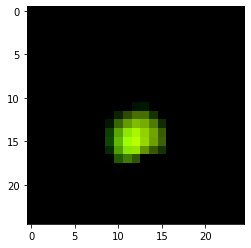

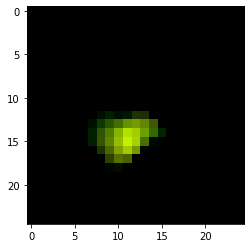

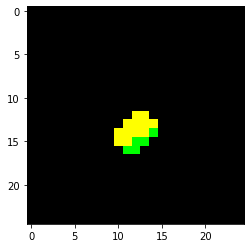

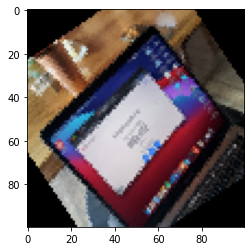

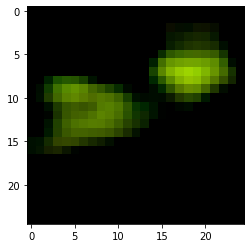

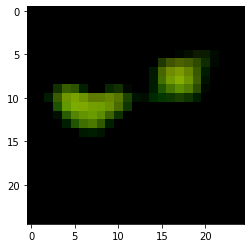

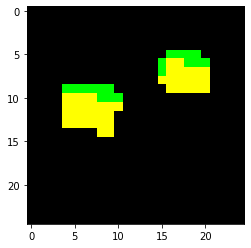

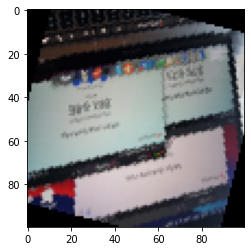

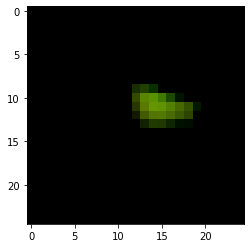

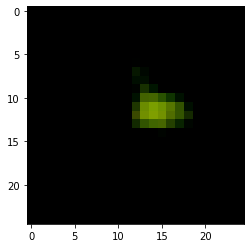

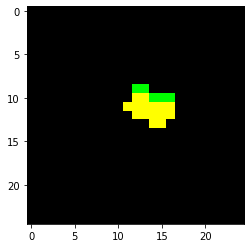

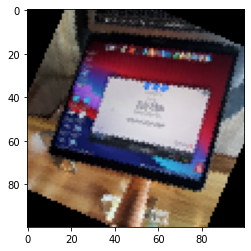

In [20]:

for i in range(3):
    plt.imshow(pre_trained_y[i])
    plt.show()
    plt.imshow(trained_y[i])
    plt.show()
    plt.imshow(real_y[i])
    plt.show()
    plt.imshow(x_test[i])
    plt.show()

In [8]:
threshold = 0.35

In [9]:
import numpy as np
def do_threshold(x):
  if x > threshold:
    return 1.0
  else:
    return 0.0

do_threshold = np.vectorize(do_threshold)

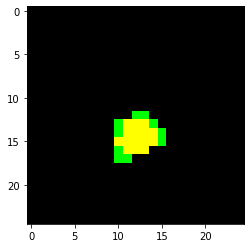

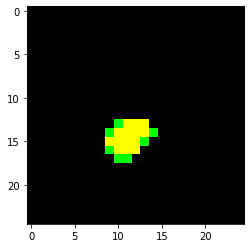

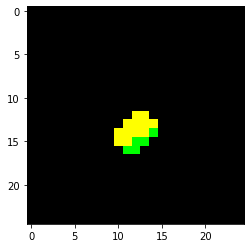

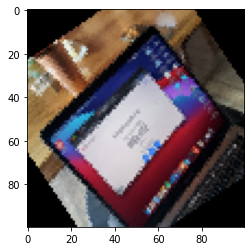

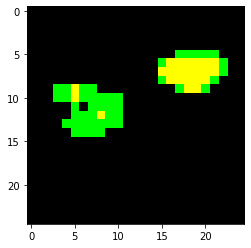

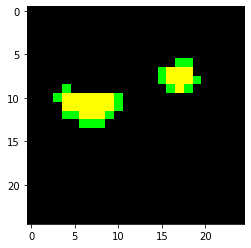

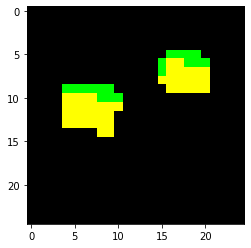

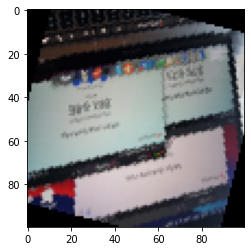

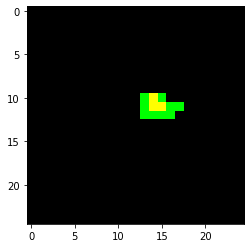

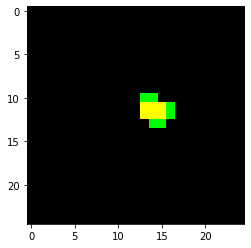

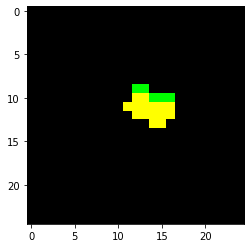

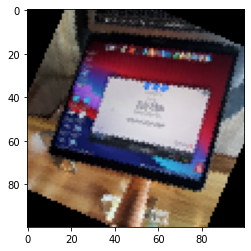

In [21]:
for i in range(3):
    plt.imshow(do_threshold(pre_trained_y[i]), vmin=0., vmax=1.)
    plt.show()
    plt.imshow(do_threshold(trained_y[i]), vmin=0., vmax=1.)
    plt.show()
    plt.imshow(real_y[i], vmin=0., vmax=1.)
    plt.show()
    plt.imshow(x_test[i])
    plt.show()

camera


In [11]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


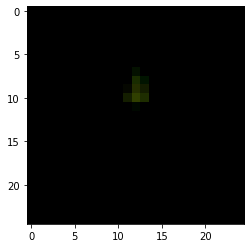

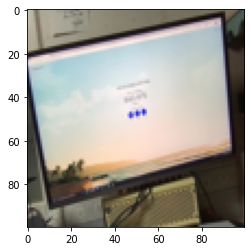

In [23]:
from IPython.display import Image
import matplotlib.pyplot as plt
import PIL.Image as pilimg

try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  img = pilimg.open(filename).resize((100, 100))
  nd_img = np.array(img) / 255
  result = net.predict(nd_img.reshape(1,100,100,3))
  plt.imshow(np.insert(result, 2, 0, -1)[0])
  plt.show()
  plt.imshow(img)
  plt.show()

except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [17]:
# 코랩에서 안됨

import cv2


capture = cv2.VideoCapture(0)
capture.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
capture.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

retval = capture.read()

capture.release()

In [18]:
retval

(False, None)

In [25]:
net.save("rc-ai/my-net-v1")

INFO:tensorflow:Assets written to: rc-ai/my-net-v1/assets
